In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os

def science_plot(fontsize = 8):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()


In [2]:
data_path = r'C:\Users\verci\Documents\Python Code\Physics157\CH1\radioactive.csv'
data_file = pd.read_csv(data_path)
print(data_file)


     T   4  4.1  4.2  4.3  4.4   6  6.1  6.2  6.3  ...  10  10.1  10.2  10.3  \
0    0   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
1    1  24   24   25   24   21  14   20   13   17  ...  10    14    10    14   
2    2  18   15   16   26   17  13   14   11   16  ...   6    13     8    11   
3    3   9   14   14   11   15   9   15    7   10  ...  10     7     6     7   
4    4  11    8    9   12   18  10   12   11   12  ...   5     5    12     8   
..  ..  ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ..   ...   ...   ...   
64  64   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
65  65   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
66  66   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
67  67   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   
68  68   0    0    0    0    0   0    0    0    0  ...   0     0     0     0   

    10.4  12  12.1  12.2  12.3  12.4  


In [3]:
df = data_file.copy()
# Perform cumulative sum on all columns except 'T'
df.iloc[:, 1:] = df.iloc[:, 1:].cumsum()

# Subtract from 100
df.iloc[:, 1:] = 100 - df.iloc[:, 1:]

print(df)

     T    4  4.1  4.2  4.3  4.4    6  6.1  6.2  6.3  ...   10  10.1  10.2  \
0    0  100  100  100  100  100  100  100  100  100  ...  100   100   100   
1    1   76   76   75   76   79   86   80   87   83  ...   90    86    90   
2    2   58   61   59   50   62   73   66   76   67  ...   84    73    82   
3    3   49   47   45   39   47   64   51   69   57  ...   74    66    76   
4    4   38   39   36   27   29   54   39   58   45  ...   69    61    64   
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
64  64    0    0    0    0    0    0    0    0    0  ...    0     0     0   
65  65    0    0    0    0    0    0    0    0    0  ...    0     0     0   
66  66    0    0    0    0    0    0    0    0    0  ...    0     0     0   
67  67    0    0    0    0    0    0    0    0    0  ...    0     0     0   
68  68    0    0    0    0    0    0    0    0    0  ...    0     0     0   

    10.3  10.4   12  12.1  12.2  12.3  12.4  
0    100   100  100   100   1

In [20]:
# Define the columns to compute statistics for
columns_4  = ['4', '4.1', '4.2', '4.3', '4.4']
columns_6  = ['6', '6.1', '6.2', '6.3', '6.4']
columns_10 = ['10', '10.1', '10.2', '10.3', '10.4']
columns_12 = ['12', '12.1', '12.2', '12.3', '12.4']

# Compute the mean and standard deviation
df["4 ave"] = df[columns_4].mean(axis=1)
df["4 std"] = df[columns_4].std(axis=1)
df["6 ave"] = df[columns_6].mean(axis=1)
df["6 std"] = df[columns_6].std(axis=1)
df["10 ave"] = df[columns_10].mean(axis=1)
df["10 std"] = df[columns_10].std(axis=1)
df["12 ave"] = df[columns_12].mean(axis=1)
df["12 std"] = df[columns_12].std(axis=1)

print(df)

     T    4  4.1  4.2  4.3  4.4    6  6.1  6.2  6.3  ...  12.3  12.4  4 ave  \
0    0  100  100  100  100  100  100  100  100  100  ...   100   100  100.0   
1    1   76   76   75   76   79   86   80   87   83  ...    94    94   76.4   
2    2   58   61   59   50   62   73   66   76   67  ...    82    88   58.0   
3    3   49   47   45   39   47   64   51   69   57  ...    76    80   45.4   
4    4   38   39   36   27   29   54   39   58   45  ...    71    73   33.8   
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...    ...   
64  64    0    0    0    0    0    0    0    0    0  ...     0     0    0.0   
65  65    0    0    0    0    0    0    0    0    0  ...     0     0    0.0   
66  66    0    0    0    0    0    0    0    0    0  ...     0     0    0.0   
67  67    0    0    0    0    0    0    0    0    0  ...     0     0    0.0   
68  68    0    0    0    0    0    0    0    0    0  ...     0     0    0.0   

       4 std  6 ave     6 std  10 ave    10 std  12

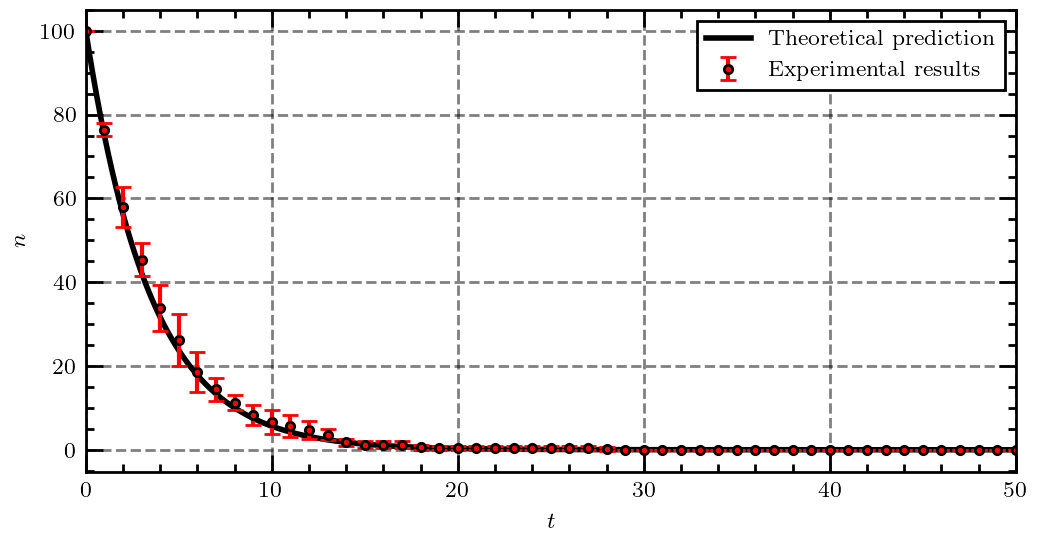

In [ ]:
imsave_path = r'C:\Users\verci\Documents\Python Code\Physics157\CH1\decay_images'
imsave = 0
x = np.arange(0,100,0.1)
y = 100*(1-1/4)**x
plt.figure(figsize = (6,3), dpi= 200)
plt.errorbar(
    df['T'],
    df['4 ave'], 
    yerr = df['4 std'], 
    color = 'r', 
    fmt='.', 
    capsize=3,
    markeredgecolor='k', 
    elinewidth = 1.5, 
    linestyle = '',
    linewidth = 1.5,
    zorder = 2,
    label = 'Experimental results'
    )
# plt.step(df['T'],df['4'])
# plt.step(df['T'],df['4.1'])
# plt.step(df['T'],df['4.2'])
# plt.step(df['T'],df['4.3'])
# plt.step(df['T'],df['4.4'])
plt.plot(
    x,
    y,
    color = 'k', 
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

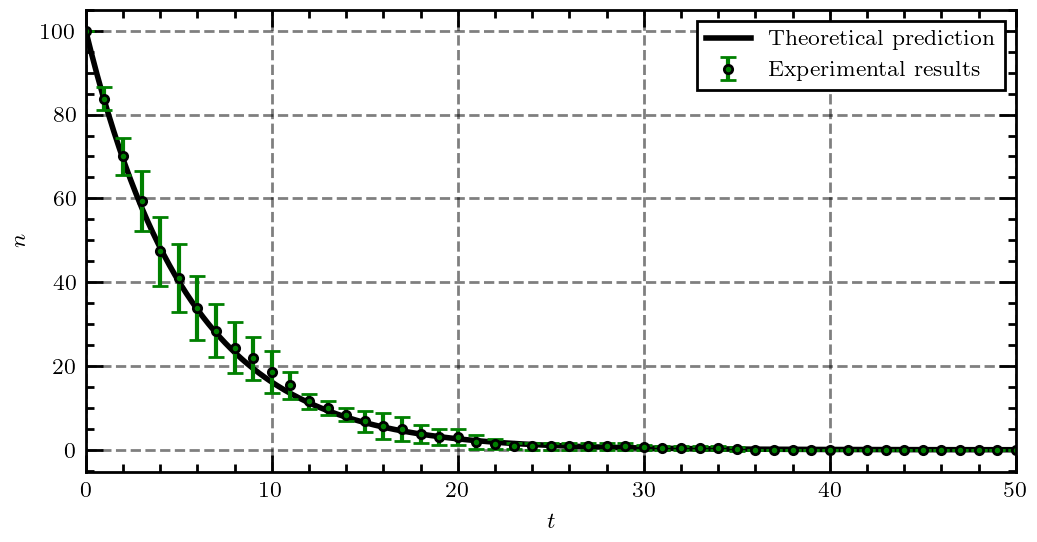

In [ ]:
x = np.arange(0,100,0.1)
y = 100*(1-1/6)**x
plt.figure(figsize = (6,3), dpi= 200)
plt.errorbar(
    df['T'],
    df['6 ave'], 
    yerr = df['6 std'], 
    color = 'g', 
    fmt='.', 
    capsize=3,
    markeredgecolor='k', 
    elinewidth = 1.5, 
    linestyle = '',
    linewidth = 1.5,
    zorder = 2,
    label = 'Experimental results'
    )
# plt.step(df['T'],df['6'])
# plt.step(df['T'],df['6.1'])
# plt.step(df['T'],df['6.2'])
# plt.step(df['T'],df['6.3'])
# plt.step(df['T'],df['6.4'])
plt.plot(
    x,
    y,
    color = 'k',
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

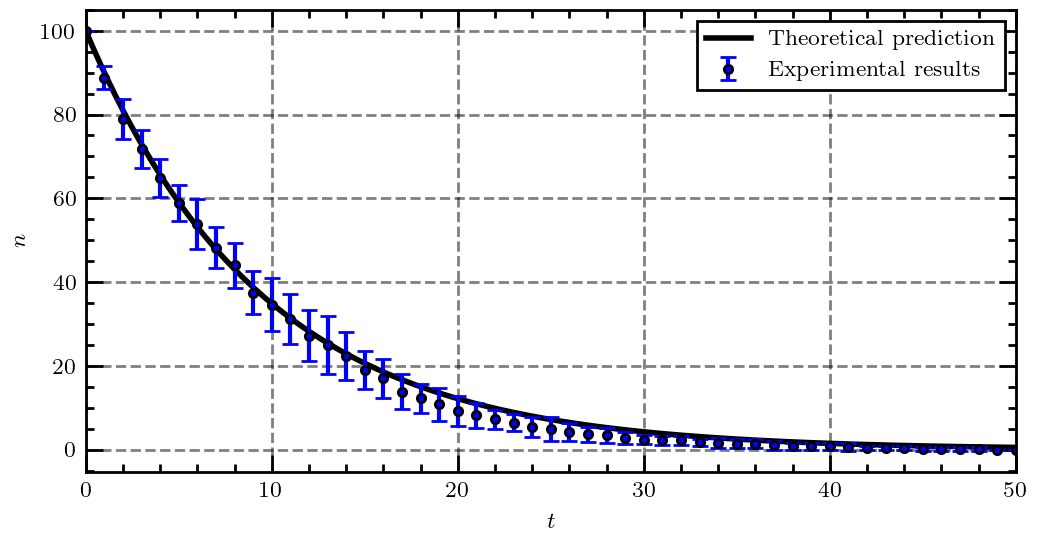

In [ ]:
x = np.arange(0,100,0.1)
y = 100*(1-1/10)**x
plt.figure(figsize = (6,3), dpi= 200)
plt.errorbar(
    df['T'],
    df['10 ave'], 
    yerr = df['10 std'], 
    color = 'b', 
    fmt='.', 
    capsize=3,
    markeredgecolor='k', 
    elinewidth = 1.5, 
    linestyle = '',
    linewidth = 1.5,
    zorder = 2,
    label = 'Experimental results'
    )
# plt.step(df['T'],df['10'])
# plt.step(df['T'],df['10.1'])
# plt.step(df['T'],df['10.2'])
# plt.step(df['T'],df['10.3'])
# plt.step(df['T'],df['10.4'])
plt.plot(
    x,
    y,
    color = 'k',
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

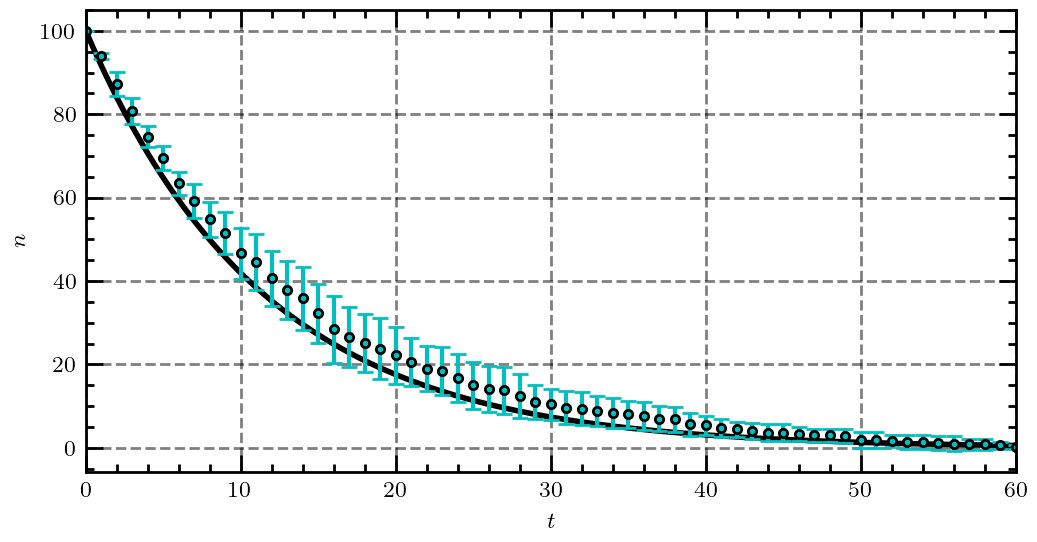

In [ ]:
x = np.arange(0,100,0.1)
y = 100*(1-1/12)**x
plt.figure(figsize = (6,3), dpi= 200)
plt.errorbar(
    df['T'],
    df['12 ave'], 
    yerr = df['12 std'], 
    color = 'c', 
    fmt='.', 
    capsize=3,
    markeredgecolor='k', 
    elinewidth = 1.5, 
    linestyle = '',
    linewidth = 1.5,
    zorder = 2,
    label = 'Experimental results'
    )
# plt.step(df['T'],df['12'])
# plt.step(df['T'],df['12.1'])
# plt.step(df['T'],df['12.2'])
# plt.step(df['T'],df['12.3'])
# plt.step(df['T'],df['12.4'])
plt.plot(
    x,
    y,
    color = 'k',
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.xlim(0,60)
plt.ylabel('$n$')
plt.xlabel('$t$')

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

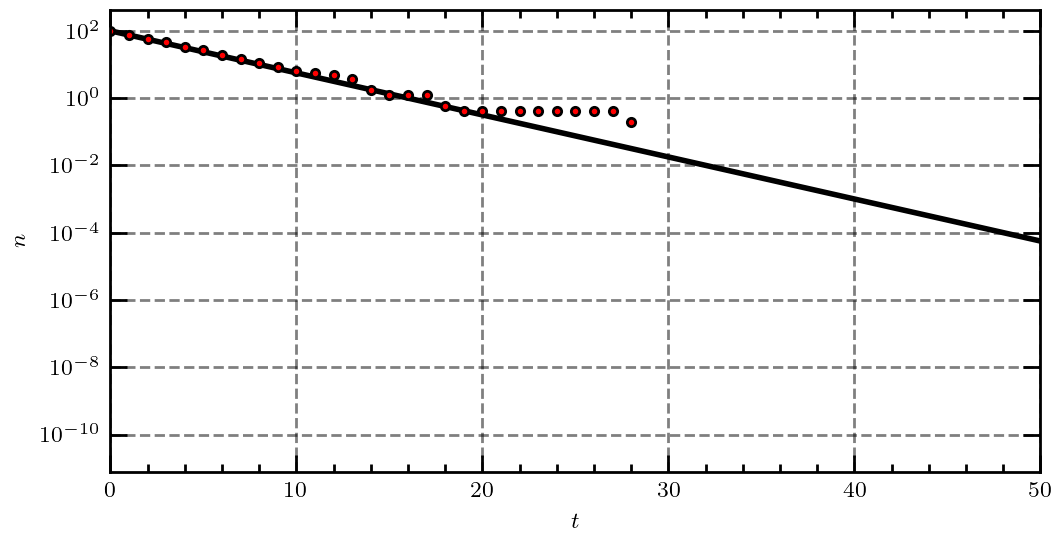

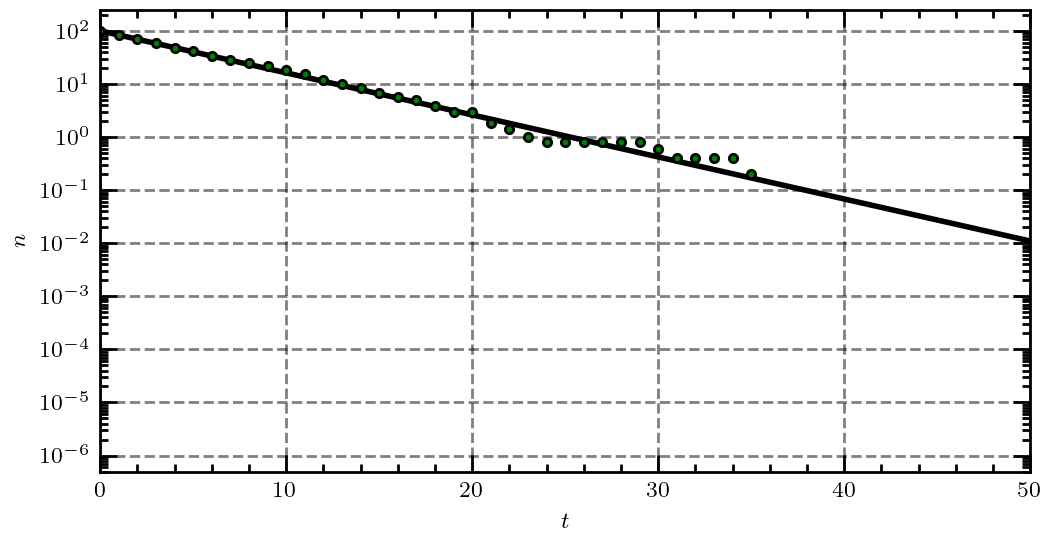

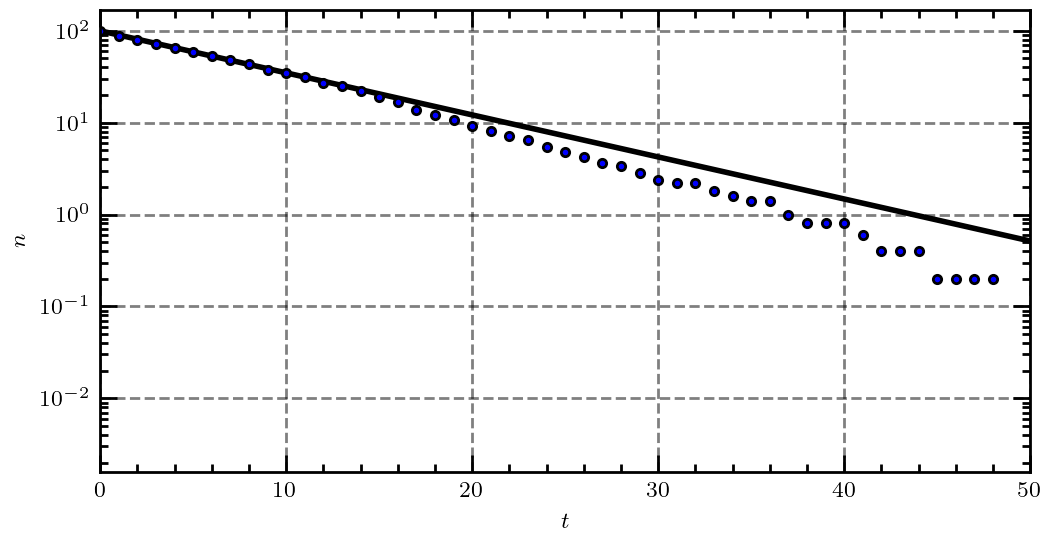

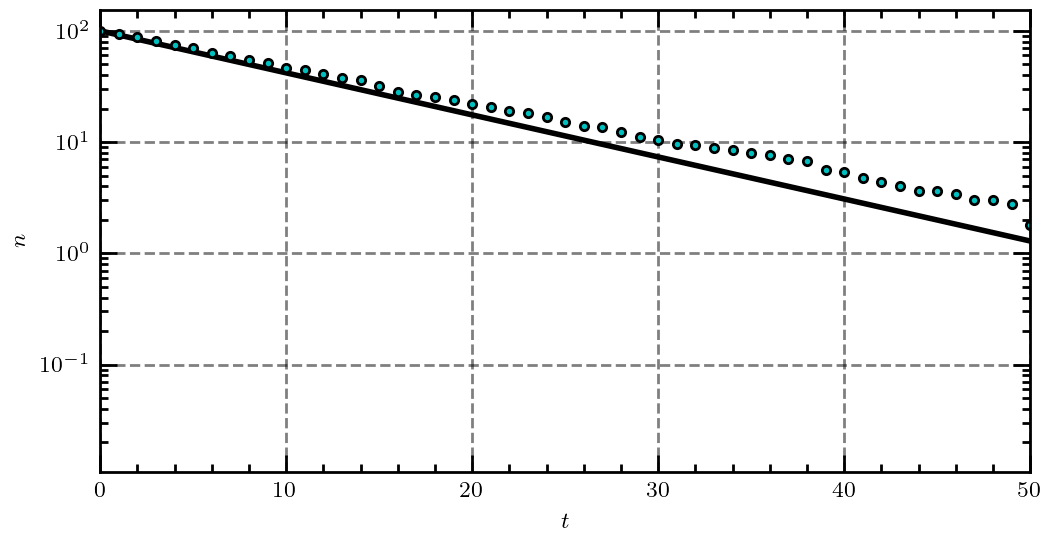

In [ ]:
x = np.arange(0,100,0.1)
y = 100*(1-1/4)**x
plt.figure(figsize = (6,3), dpi= 200)
# plt.errorbar(
#     df['T'],
#     df['4 ave'], 
#     yerr = df['4 std'], 
#     color = 'r', 
#     fmt='.', 
#     capsize=3,
#     markeredgecolor='k', 
#     elinewidth = 1.5, 
#     linestyle = '-',
#     linewidth = 1.5
#     )
plt.scatter(
    df['T'],
    df['4 ave'], 
    color = 'r',
    marker = '.',
    edgecolor = 'k',
    zorder = 2,
    label = 'Experimental results'
)
y = 100*(1-1/4)**x
plt.plot(
    x,
    y,
    color = 'k', 
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.yscale("log")
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

plt.figure(figsize = (6,3), dpi= 200)
plt.scatter(
    df['T'],
    df['6 ave'], 
    color = 'g',
    marker = '.',
    edgecolor = 'k',
    zorder = 2,
    label = 'Experimental results'
)
y = 100*(1-1/6)**x
plt.plot(
    x,
    y,
    color = 'k', 
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.yscale("log")
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

plt.figure(figsize = (6,3), dpi= 200)
plt.scatter(
    df['T'],
    df['10 ave'], 
    color = 'b',
    marker = '.',
    edgecolor = 'k',
    zorder = 2,
    label = 'Experimental results'
)
y = 100*(1-1/10)**x
plt.plot(
    x,
    y,
    color = 'k', 
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.yscale("log")
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

plt.figure(figsize = (6,3), dpi= 200)
plt.scatter(
    df['T'],
    df['12 ave'], 
    color = 'c',
    marker = '.',
    edgecolor = 'k',
    zorder = 2,
    label = 'Experimental results'
)
y = 100*(1-1/12)**x
plt.plot(
    x,
    y,
    color = 'k', 
    zorder = 1,
    label = 'Theoretical prediction'
    )
plt.yscale("log")
plt.xlim(0,50)
plt.ylabel('$n$')
plt.xlabel('$t$')
plt.legend()

imsave += 1
plt.savefig(os.path.join(imsave_path, f'fig{imsave}.png'))

plt.show()

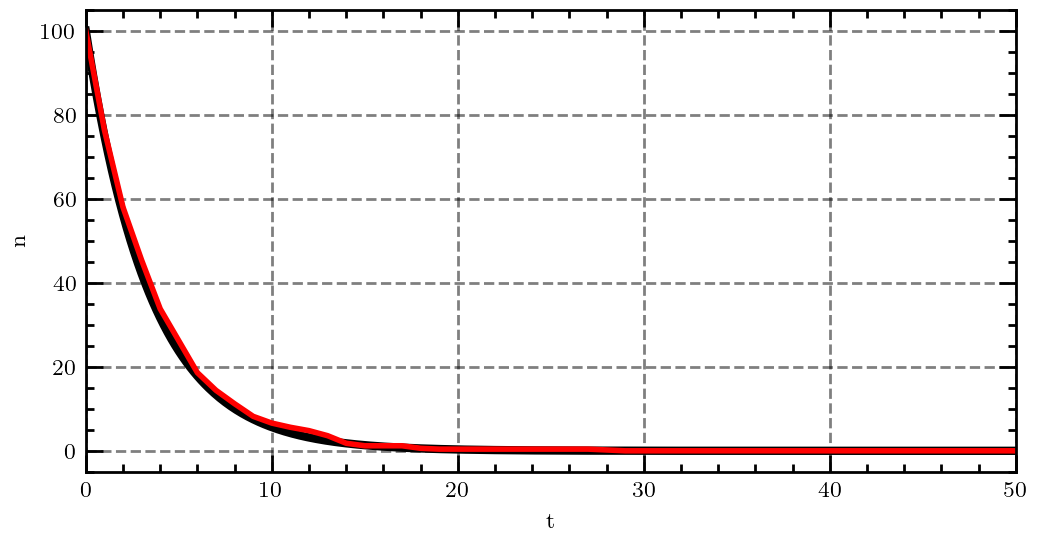

In [15]:
plt.figure(figsize = (6,3), dpi= 200)
plt.plot(x,y, 'k', linewidth = 3)
plt.plot(
    df['T'],
    df['4 ave'],
    color = 'r'
)
plt.xlim(0,50)
plt.ylabel('n')
plt.xlabel('t')
plt.show()